In [1]:
from models import get_model
from models import CSRNet, CSRNet_Back


In [2]:
back = CSRNet_Back()
model = CSRNet(back, True)

In [3]:
from PIL import Image

In [4]:
cell_img = Image.open('/Users/aubrydandoque/Documents/Cours/X_2019-20/P2/MAP583-DeepLearning/Projet/MAP583-DeepLearning/Dataset/cells/001cell.png')

In [5]:
cell_img.show()

In [14]:
print(cell_img.size)

(256, 256)


In [10]:
import torch
import torchvision

In [24]:
imsize = 256
loader = torchvision.transforms.Compose([torchvision.transforms.Scale(imsize), torchvision.transforms.ToTensor()])

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = torch.autograd.Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image.to(torch.device('cpu')) #assumes that you're using GPU

In [25]:
input = image_loader('/Users/aubrydandoque/Documents/Cours/X_2019-20/P2/MAP583-DeepLearning/Projet/MAP583-DeepLearning/Dataset/cells/001cell.png')

In [26]:
output = model(input)

In [27]:
import matplotlib.pyplot as plt

In [28]:
plt.imshow(output.data())

TypeError: 'Tensor' object is not callable

In [29]:
toPil = torchvision.transforms.ToPILImage()

In [33]:
img_out = toPil(output[0,:,:,:]) 

In [34]:
img_out.show()

In [11]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
res = pickle.load(open('./data/runs/CSRNet_cell/res/test_results_list_ep0.json','rb'))

In [4]:
input, target, output = res[0]

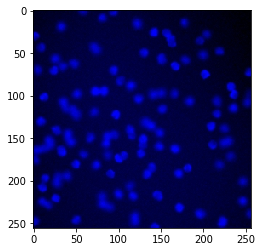

In [15]:
plt.imshow(np.transpose(input[0], (1, 2, 0)))

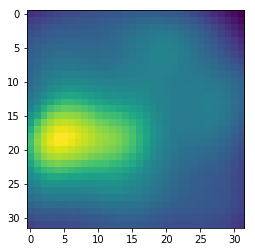

In [20]:
plt.imshow(np.squeeze(target[0]))

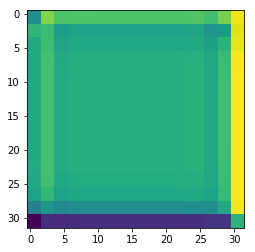

In [21]:
plt.imshow(np.squeeze(output[0]))

In [25]:
3//3

1

In [45]:
def save_res_img(res, out_fn):

    imlist = []
    for test in res:
        input, target, output = test
        imlist.append(np.transpose(input[0], (1, 2, 0)))
        imlist.append(np.squeeze(target[0]))
        imlist.append(np.squeeze(output[0]))

# .permute(1, 2, 0)
    plt.figure(figsize=(24, 24))
    for idx, _ in enumerate(imlist):
        plt.subplot(1+(len(imlist)//3), 3, idx+1)
        plt.imshow(imlist[idx])
        if idx % 3 == 0:
            plt.ylabel('input image')
        elif idx % 3 == 1:
            plt.ylabel('groundtruth image')
        else:
            plt.ylabel('output image')
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

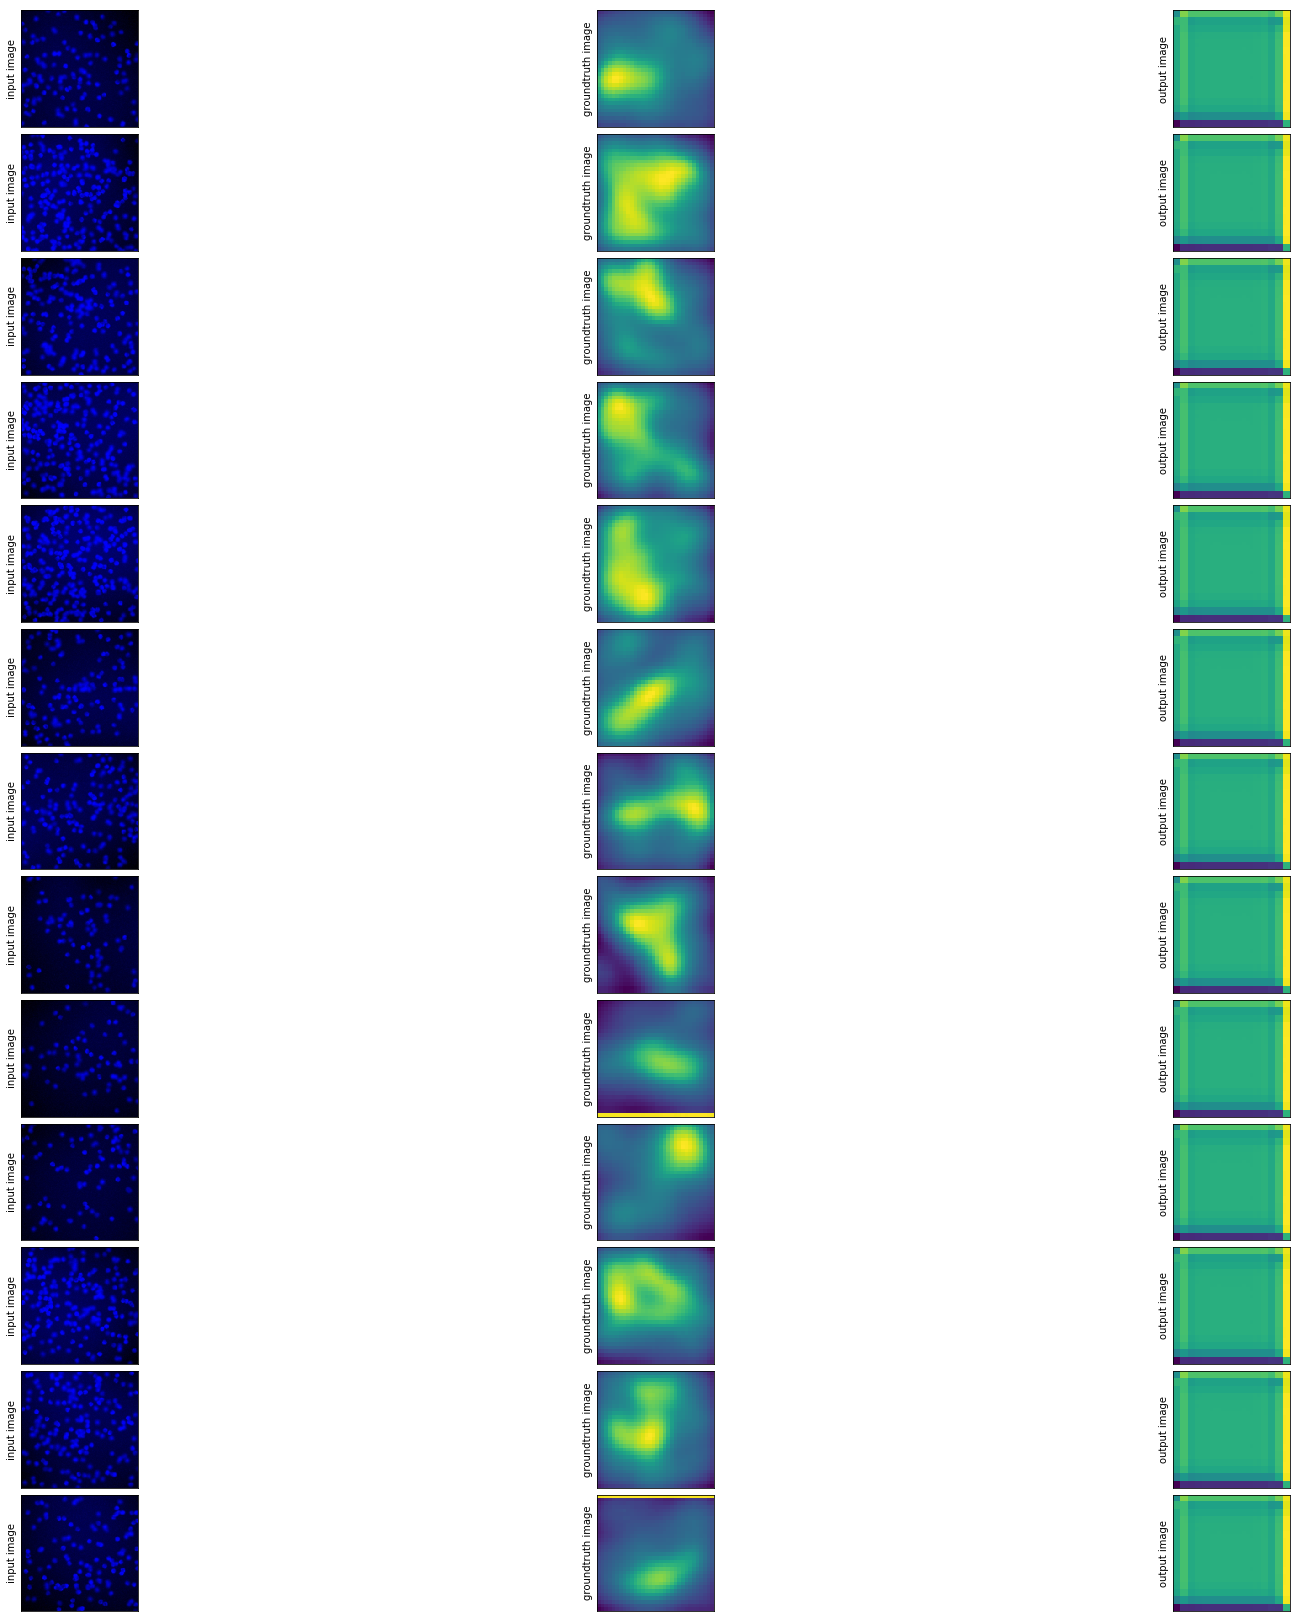

In [46]:
save_res_img(res, '')

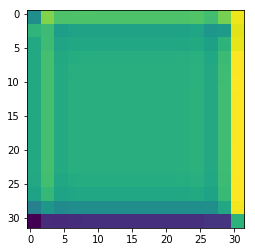

In [38]:
for ind in res:
    input, target, output = ind
    plt.imshow(np.squeeze(output[0]))

In [35]:
print(res[1])

[array([[[[0.        , 0.        , 0.00392157, ..., 0.00392157,
          0.        , 0.        ],
         [0.        , 0.        , 0.00392157, ..., 0.        ,
          0.00392157, 0.00392157],
         [0.        , 0.        , 0.        , ..., 0.00784314,
          0.00784314, 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.00784314,
          0.00784314, 0.        ],
         [0.        , 0.        , 0.00392157, ..., 0.        ,
          0.00784314, 0.        ],
         [0.        , 0.00784314, 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.00392157, 0.        , ..., 0.        ,
          0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.00784314, 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.01176471,
          0.01176471, 0.

In [41]:
input, target, output = res[6]

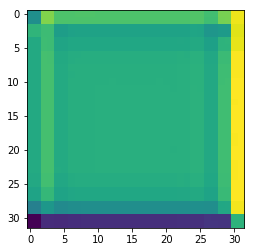

In [42]:
plt.imshow(np.squeeze(output[0]))